In [1]:
import pandas as pd
train=pd.read_csv('./train.csv')
test=pd.read_csv('./test.csv')

# EDA

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

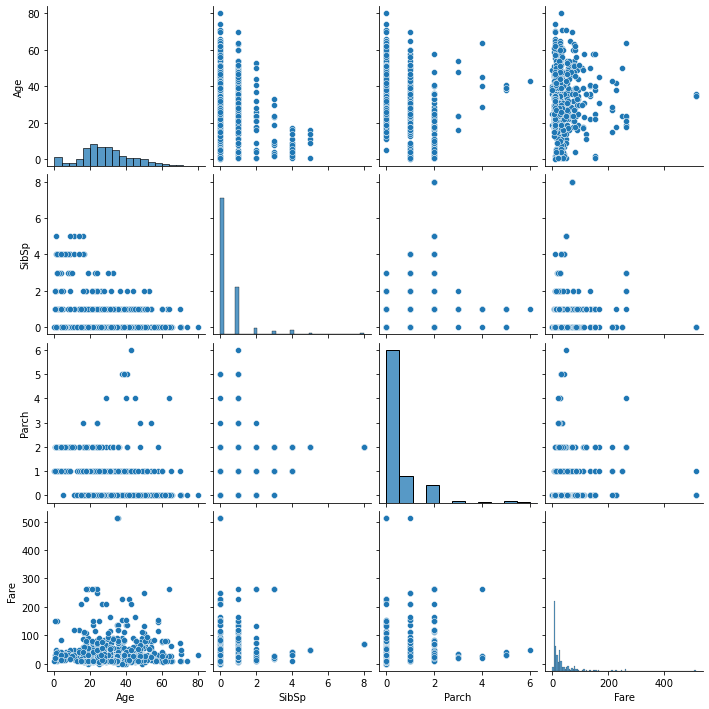

In [3]:
sns.pairplot(train.loc[:,'Age':'Fare'])
plt.show()

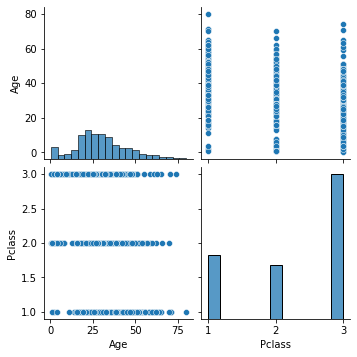

In [4]:
sns.pairplot(train.loc[:,['Age','Pclass','Embarked']])
plt.show()

# Preprocessing

In [5]:
# drop
train.drop(['Cabin','PassengerId','Ticket','Name'],axis=1,inplace=True)
test.drop(['Cabin','PassengerId','Ticket','Name'],axis=1,inplace=True)

In [6]:
# train과 test의 Age의 결측 처리
train["Age"] = train["Age"].fillna(train.groupby(['Pclass','SibSp','Parch'])['Age'].transform('mean'))
test["Age"] = test["Age"].fillna(test.groupby(['Pclass','SibSp','Parch'])['Age'].transform('mean'))

train["Age"] = train["Age"].fillna(train["Age"].mean())
test["Age"] = test["Age"].fillna(test["Age"].mean())

In [7]:
# train의 Embarked의 결측 처리
train[train['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [8]:
a=train['Pclass']==1
b=train['Sex']=='female'
c=train['Age']>37
d=train['SibSp']==0
e=train['Parch']==0
f=train['Embarked']=='S'

train[a&b&d&e][['Embarked']].value_counts()

Embarked
C           18
S           14
dtype: int64

In [9]:
train['Embarked']=train['Embarked'].fillna('C')

In [10]:
# test의 Fare 결측 처리
test[test['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
152,3,male,60.5,0,0,NaN,S


In [11]:
a=test['Pclass']==3
b=test['Sex']=='male'
c=test['Age']>37
d=test['SibSp']==0
e=test['Parch']==0
f=test['Embarked']=='S'

test[a&b&f&d&e&c].mean()

Pclass     3.00000
Age       44.70000
SibSp      0.00000
Parch      0.00000
Fare       9.52395
dtype: float64

In [12]:
test['Fare']=test['Fare'].fillna(10)

In [13]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
Sex_le=le1.fit_transform(train['Sex'])
train['Sex']=Sex_le

le2=LabelEncoder()
Embarked_le=le2.fit_transform(train['Embarked'])
train['Embarked']=Embarked_le

le3=LabelEncoder()
Embarked_le=le3.fit_transform(test['Sex'])
test['Sex']=Embarked_le

le4=LabelEncoder()
Embarked_le=le4.fit_transform(test['Embarked'])
test['Embarked']=Embarked_le

In [14]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
MMS1=MinMaxScaler()
Fare_MMS=MMS1.fit_transform(train[['Fare']])
train['Fare']=Fare_MMS

MMS2=MinMaxScaler()
Fare_MMS=MMS2.fit_transform(test[['Fare']])
test['Fare']=Fare_MMS

MMS3=MinMaxScaler()
Fare_MMS=MMS3.fit_transform(train[['Age']])
train['Age']=Fare_MMS

MMS4=MinMaxScaler()
Fare_MMS=MMS4.fit_transform(test[['Age']])
test['Age']=Fare_MMS

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int32  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 19.7 KB


# Save

In [17]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,2
1,1,1,0,0.472229,1,0,0.139136,0
2,1,3,0,0.321438,0,0,0.015469,2
3,1,1,0,0.434531,1,0,0.103644,2
4,0,3,1,0.434531,0,0,0.015713,2
...,...,...,...,...,...,...,...,...
886,0,2,1,0.334004,0,0,0.025374,2
887,1,1,0,0.233476,0,0,0.058556,2
888,0,3,0,0.164363,1,2,0.045771,2
889,1,1,1,0.321438,0,0,0.058556,0


In [23]:
train.to_csv('train0916.csv',index=False)
test.to_csv('test0916.csv',index=False)

#The end#